In [8]:
from evaluate import computeScores
import json
from os import listdir

In [9]:
# Noise Experiment 

# Query Folders to be named as pitch_extranotes_deleted

collection_dir="Data/Original Collection"

query_folders_location="Data/Noisy Queries"

for query_dir in listdir(query_folders_location):
    output_dir=f"Results/Noisy{query_dir}"
    query_dir=f"{query_folders_location}/{query_dir}"
    computeScores(query_dir,collection_dir,num_queries=5,num_collection=30,similarity_type="text",output_dir=output_dir)

Reading queries....


100%|██████████| 5/5 [00:00<00:00, 323.86it/s]


Reading collection....


100%|██████████| 30/30 [00:02<00:00, 12.41it/s]


Computing Similarities..


100%|██████████| 5/5 [00:56<00:00, 11.26s/it]


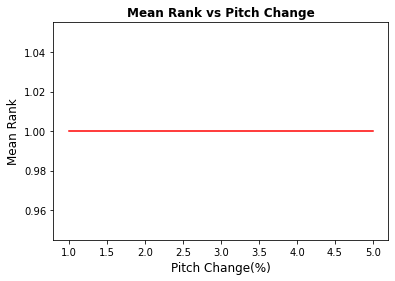

In [41]:
# Analysing trends with respect to noise functions-Plot Mean Rank
import pandas as pd
import matplotlib.pyplot as plt


metric="Mean Rank"
noise="Pitch Change"
output_dir="Results/NoisyGraphs"
#result_folders=["Results/NoisyResults/1_2_3","Results/NoisyResults/5_6_8"]



result_folders=[f"Results/{query_dir}" for query_dir in listdir(query_folders_location)]

noise2index={
    "Pitch Change":0,
    "Extra Notes":1,
    "Delete Notes":2,
}


metric2index={
    "Recall@1":0,
    "Recall@3":1,
    "Recall@5":2,
    "Recall@10":3,
    "Mean Rank":4,
    "Normalised Similarity":5,
    "Margin of Error":6,
    "Average Confidence":7,
    "MRR":8
}

metric_index=metric2index[metric]
noise_index=noise2index[noise]

noise_dict={}

for folder in result_folders:
    noise_value=float(folder.split("/")[-1].split("_")[noise_index])

    df=pd.read_csv(f"{folder}/analysis.csv")
    metric_value=df.iloc[metric_index]["Value"]

    noise_dict[noise_value]=metric_value

X=list(noise_dict.keys())
Y=list(noise_dict.values())
plt.plot(X,Y,c="r")
plt.title(f"{metric} vs {noise}", fontsize=12, weight='bold')
plt.xlabel(f"{noise}(%)", fontsize=12)
plt.ylabel(f"{metric}", fontsize=12)
plt.savefig(f"{output_dir}/{metric}VS{noise}.png".replace(" ",""))